# CS 3300 Data Science - Lab 2: Exploratory Data Analysis Visualization

## Stuart Harley

### Introduction

In this lab we explore our cleaned data from the previous lab. Specifically, we are trying to determine how predictive our features are of the price and type of the properties. If we were to attempt to create a model to predict these features, it would be important to base that model only on the predictive features of this dataset. To do this we create a variety of different plots to visualize any correlation that we might see. The type of plot is determined by the type of data. For a continuous feature v. a contiuous feature, we make a scatter plot. For a continous feature v. a categorical feature, we make a box plot. For a categorical feature v. a categorical feature, we make a heatmap.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

### Loading the Data

In [2]:
df = pd.read_csv('CleanedSacramentorealestatetransactions.csv', \
                dtype={'city': 'category', 'zip': 'category', \
                      'state': 'category', 'beds': 'category', \
                      'baths': 'category', 'type': 'category', \
                      'street_type': 'category'})
df = df[df.type != 'Unkown']
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 14 columns):
street         984 non-null object
city           984 non-null category
zip            984 non-null category
state          984 non-null category
beds           984 non-null category
baths          984 non-null category
sq__ft         984 non-null int64
type           984 non-null category
sale_date      984 non-null object
price          984 non-null int64
latitude       984 non-null float64
longitude      984 non-null float64
empty_lot      984 non-null bool
street_type    984 non-null category
dtypes: bool(1), category(7), float64(2), int64(2), object(2)
memory usage: 67.6+ KB


### Part I: Regression on Price
We are exploring which variables are predictive of the price.

Creating a scatter plot of each continuous variable versus price.

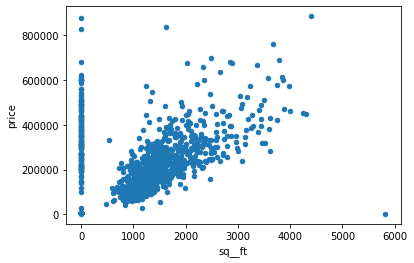

In [4]:
df.plot.scatter(x='sq__ft', y='price');

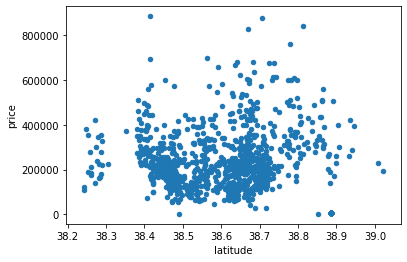

In [5]:
df.plot.scatter(x='latitude', y='price');

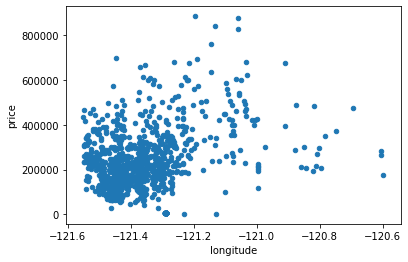

In [6]:
df.plot.scatter(x='longitude', y='price');

A predictive continous independent variable will correlate with the output variable. Creating a table which lists each continuous independent varirable as predictive or not.

| Predictive | Not Predictive |
| --- | --- |
| Sq Ft | |
| | Latitude |
| Longitude | |

Creating a box plot of each categorical variable versus price.

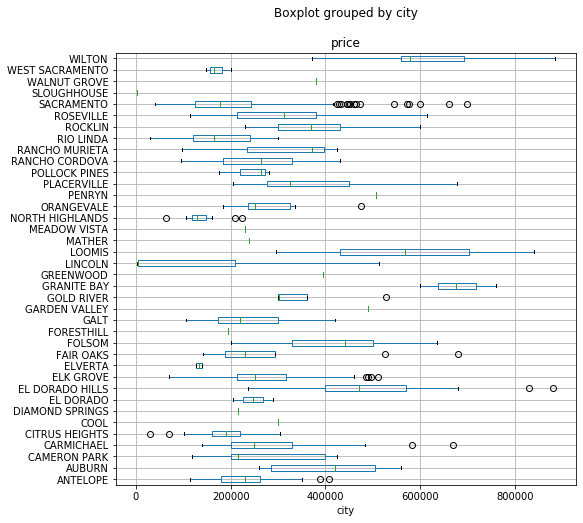

In [7]:
df.boxplot(by='city', column='price', vert=False, figsize=(8,8));

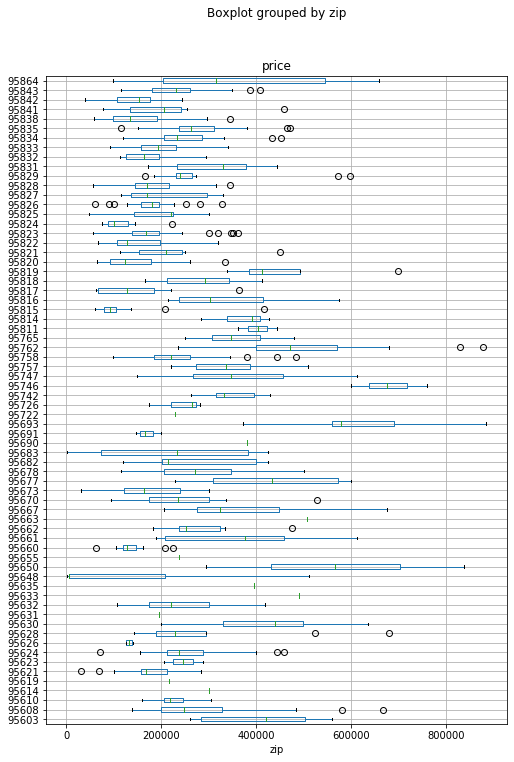

In [8]:
df.boxplot(by='zip', column='price', vert=False, figsize=(8,12));

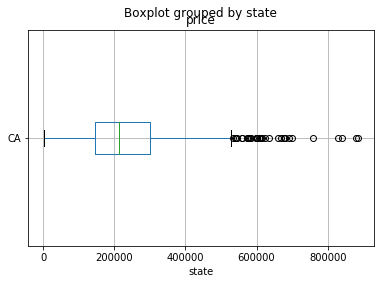

In [9]:
df.boxplot(by='state', column='price', vert=False);

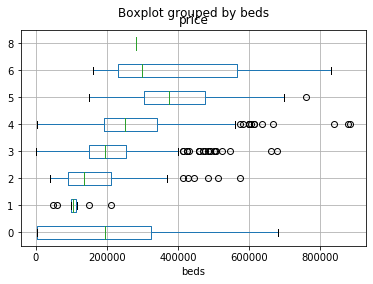

In [10]:
df.boxplot(by='beds', column='price', vert=False);

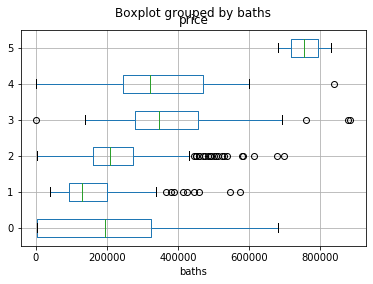

In [11]:
df.boxplot(by='baths', column='price', vert=False);

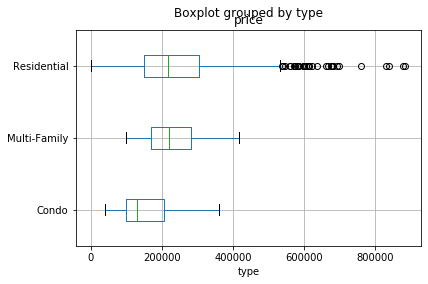

In [12]:
df.boxplot(by='type', column='price', vert=False);

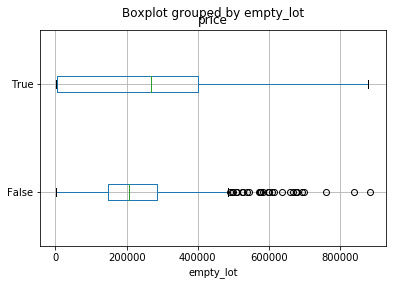

In [13]:
df.boxplot(by='empty_lot', column='price', vert=False);

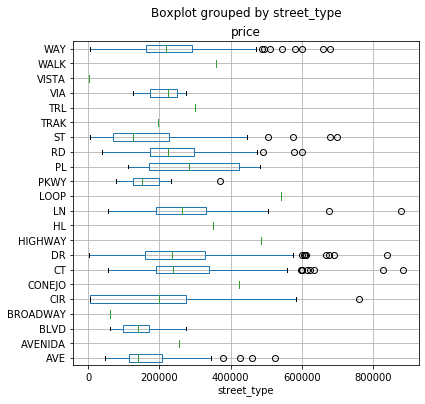

In [14]:
df.boxplot(by='street_type', column='price', vert=False, figsize=(6,6));

A predictive categorical independent variable has different distributions of the output variable for each categorical value. Creating a table which lists each categorical independent varirable as predictive or not.

| Predictive | Not Predictive |
| --- | --- |
| city | |
| zip | |
| | state |
| beds | |
| baths | |
| type | |
| | empty lot |
| | street type |

### Part II: Classification of Property Type
We are exploring which variables are predictive of the property type.

Creating a box plot of each continuous variable versus property type.

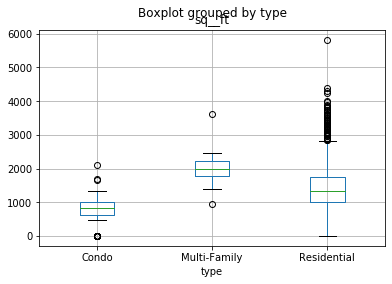

In [15]:
df.boxplot(by='type', column='sq__ft');

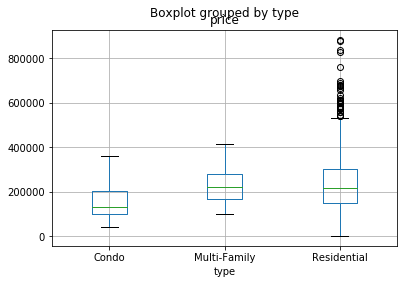

In [16]:
df.boxplot(by='type', column='price');

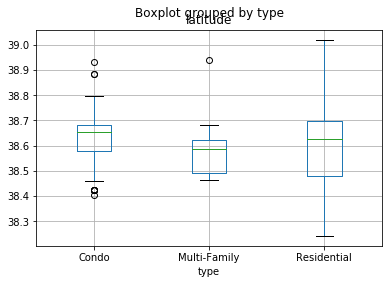

In [17]:
df.boxplot(by='type', column='latitude');

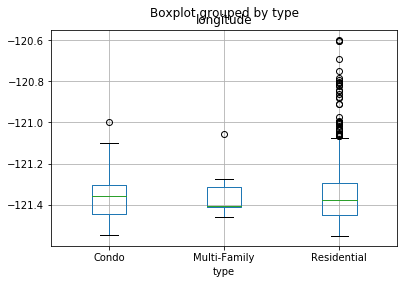

In [18]:
df.boxplot(by='type', column='longitude');

A predictive continuous independent variable has different distributions of the output variable for each categorical output value. Creating a table which lists each continuous independent varirable as predictive or not.

| Predictive | Not Predictive |
| --- | --- |
| Sq Ft | |
| price | |
| | Latitude |
| | Longitude |

For each categorical variable, creating a heatmap of the counts of each categorical variable value for each property type.

In [19]:
df['count'] = 1

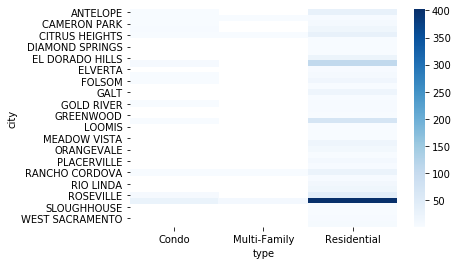

In [20]:
df2 = df.groupby(['type', 'city'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'city', 'type'), cmap="Blues");

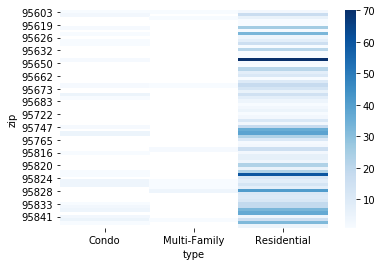

In [21]:
df2 = df.groupby(['type', 'zip'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'zip', 'type'), cmap="Blues");

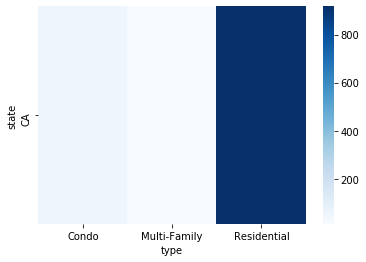

In [22]:
df2 = df.groupby(['type', 'state'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'state', 'type'), cmap="Blues");

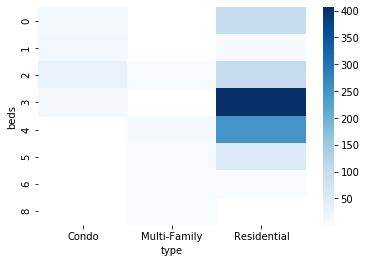

In [23]:
df2 = df.groupby(['type', 'beds'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'beds', 'type'), cmap="Blues");

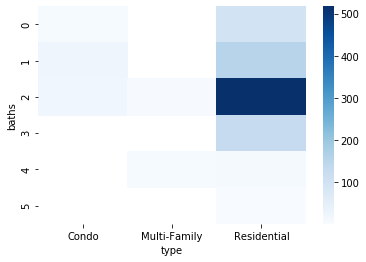

In [24]:
df2 = df.groupby(['type', 'baths'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'baths', 'type'), cmap="Blues");

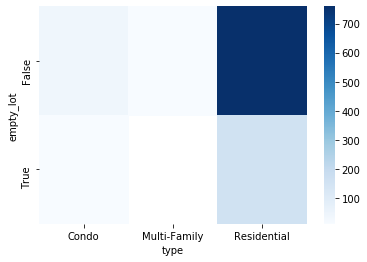

In [25]:
df2 = df.groupby(['type', 'empty_lot'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'empty_lot', 'type'), cmap="Blues");

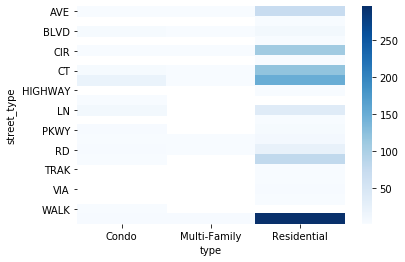

In [26]:
df2 = df.groupby(['type', 'street_type'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'street_type', 'type'), cmap="Blues");

In [27]:
del df['count']

A categorical variable is predictive if each value occurs frequently with one value of the output variable. Creating a table which lists each categorical independent variable as predictive or not.

| Predictive | Not Predictive |
| --- | --- |
| city | |
| zip | |
| | state |
| beds | |
| baths | |
| | empty lot |
| street type | |

### Part III: Compare Predictive Variables

Making a Venn Diagram of the variables I described as predictive.

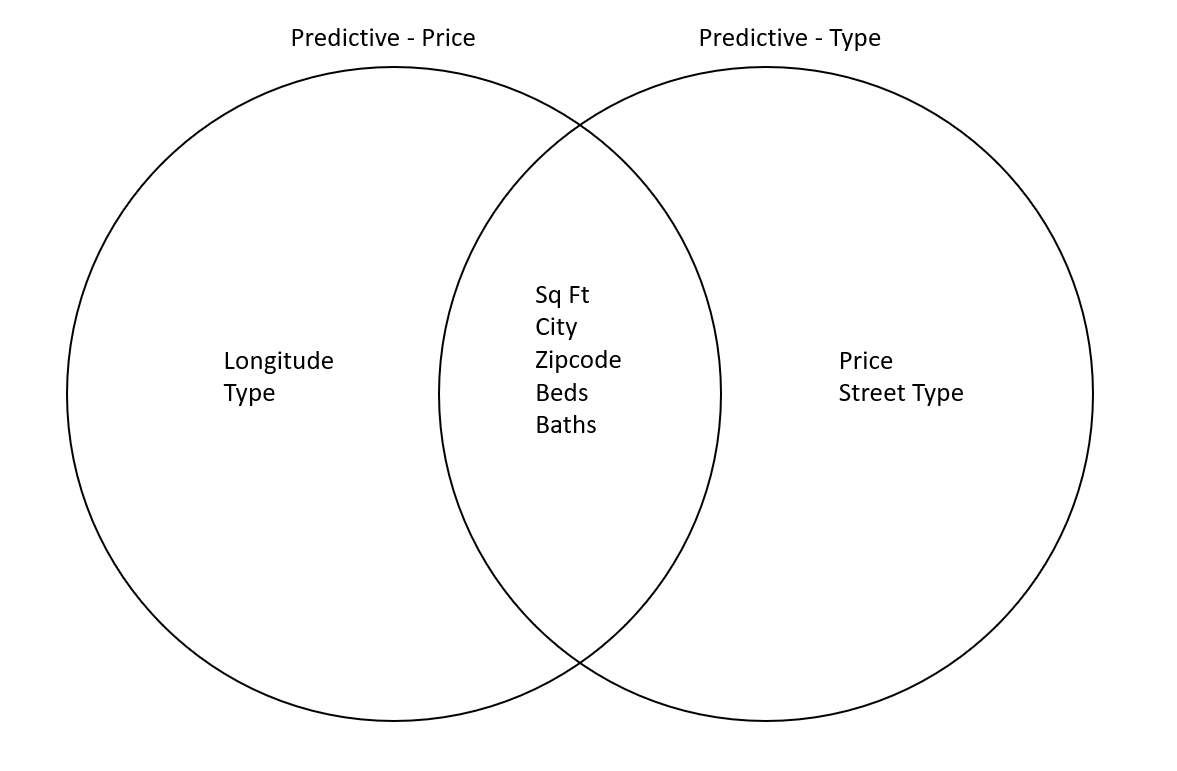

In [28]:
Image("Venn Diagram.png", width='700')

5 variables are predictive for both problems, as shown above.

| Variable | Possible reason why this variable is predictive |
| --- | --- |
| Longitude | The North or South side of Sacremento might be nicer compared to the other. |
| Type | The type of property can determine how much it is worth. For example, Condos are generally worth less than houses. |
| Price | Vice-Versa with price above |
| Street Type | Street types correspond to the type of road, which can indicate what type of house is found on it. For example, a cul-de-sac most likely has residental homes. It can also indicate price because nicer homes are built on safer road types. |
| Sq Ft | In general, the larger something is, the more it will cost. Also, different types of properties are different sizes. ie homes are bigger than condos. |
| City | Some suburbs of Sacremento are most likely nicer than others. All cities have good and bad parts. Therefore, the properties in the nicer parts will be worth more money. Also, generally different areas around a city are known to be for example, retirement areas, rapidly expanding. And the people that live in these cities require different types of homes. |
| Zipcode | The zipcodes correspond to the different areas/cities so the same reason as above. |
| Beds | Generally, the more bedrooms a property has, the more it costs. And different types of properties generally have different numbers of bedrooms. ie a Condo has less beds than a home. |
| Baths | The same logic as with bedrooms. |

### Conclusion

In conclusion, some of our features are more predictive than others. Possible reasons why are given directly above. Compared to the price feature, I feel that the type feature is not as good to predict. This is because the amount of different types of properties is very different.

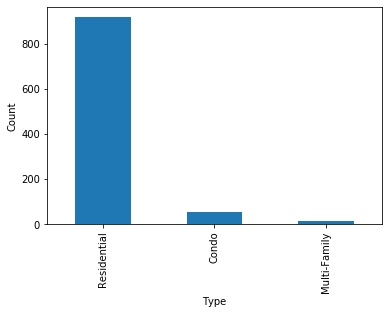

In [29]:
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count');

As you can see above, almost all of the properties sold in this dataset are residential. This made determining what features are predictive for the type tricky, especially in the heatmaps. Because the heatmaps were based off the counts, the residential counts were always much higher than the others. This made it seem like these features were predictive, but in reality, there are just way more residential homes.